In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Average
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
train_data_dir = '/content/drive/MyDrive/dogdataset/train1'
validation_data_dir = '/content/drive/MyDrive/dogdataset/validation1'

In [ ]:
img_width, img_height = 299, 299
batch_size = 32
num_classes = 120

In [ ]:
total_training_samples = 18614
total_validation_samples = 2123

In [ ]:
steps_per_epoch = total_training_samples // batch_size
validation_steps = total_validation_samples // batch_size

In [ ]:
train_datagen = image.ImageDataGenerator(preprocessing_function=inception_preprocess_input)
validation_datagen = image.ImageDataGenerator(preprocessing_function=inception_preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' to use one-hot encoding for labels
    shuffle=True
)

Found 18614 images belonging to 120 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2123 images belonging to 120 classes.


In [ ]:
base_inception = InceptionV3(weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
base_xception = Xception(weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in base_inception.layers:
    layer.trainable = False

for layer in base_xception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(base_inception.output)
x = Dense(1000,activation='relu')(x)
prediction = Dense(num_classes,activation='softmax')(x)
inception_model = Model(inputs = base_inception.input, outputs = prediction)

In [ ]:
inception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpoch/inception_model_epoch_v2{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.7275 - accuracy: 0.8005

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 291s 501ms/step - loss: 0.7275 - accuracy: 0.8005 - val_loss: 0.6467 - val_accuracy: 0.8324
Epoch 2/10
581/581 [==============================] - 158s 272ms/step - loss: 0.4914 - accuracy: 0.8532 - val_loss: 0.6877 - val_accuracy: 0.8366
Epoch 3/10
581/581 [==============================] - 169s 290ms/step - loss: 0.4363 - accuracy: 0.8647 - val_loss: 0.7238 - val_accuracy: 0.8314
Epoch 4/10
581/581 [==============================] - 161s 277ms/step - loss: 0.3936 - accuracy: 0.8755 - val_loss: 0.6582 - val_accuracy: 0.8376
Epoch 5/10
581/581 [==============================] - 158s 272ms/step - loss: 0.3843 - accuracy: 0.8802 - val_loss: 0.6422 - val_accuracy: 0.8438
Epoch 6/10
581/581 [==============================] - 156s 268ms/step - loss: 0.3546 - accuracy: 0.8867 - val_loss: 0.7391 - val_accuracy: 0.8267
Epoch 7/10
581/581 [==============================] - 156s 268ms/step - loss: 0.3263 - accuracy: 0.8952 - val_loss: 0.8024 - val_accura

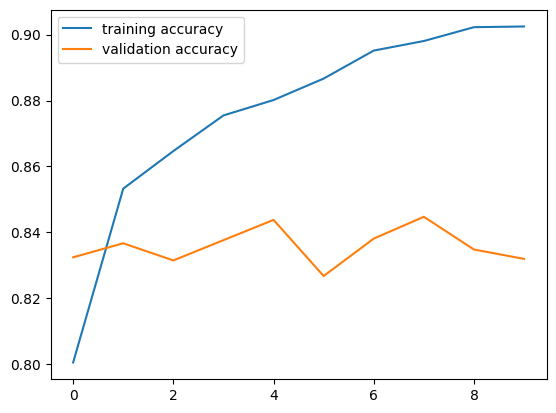

In [ ]:
import matplotlib.pyplot as plt
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()


In [ ]:
inception_model.save('/content/drive/MyDrive/inception(1to10)Epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os

In [ ]:
inception_checkpoint_path = '/content/drive/MyDrive/InceptionEpoch/inception_model_epoch_v210.h5'
if os.path.exists(inception_checkpoint_path):
    inception_model.load_weights(inception_checkpoint_path)

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpochV2/inception_model_epoch_v2{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - 162s 278ms/step - loss: 0.2811 - accuracy: 0.9072 - val_loss: 0.7333 - val_accuracy: 0.8357
Epoch 2/10
581/581 [==============================] - 157s 269ms/step - loss: 0.2692 - accuracy: 0.9121 - val_loss: 0.8362 - val_accuracy: 0.8428
Epoch 3/10
581/581 [==============================] - 160s 275ms/step - loss: 0.2595 - accuracy: 0.9143 - val_loss: 0.8472 - val_accuracy: 0.8357
Epoch 4/10
581/581 [==============================] - 157s 270ms/step - loss: 0.2514 - accuracy: 0.9150 - val_loss: 0.8790 - val_accuracy: 0.8324
Epoch 5/10
581/581 [==============================] - 159s 273ms/step - loss: 0.2412 - accuracy: 0.9166 - val_loss: 0.8620 - val_accuracy: 0.8329
Epoch 6/10
581/581 [==============================] - 157s 271ms/step - loss: 0.2383 - accuracy: 0.9184 - val_loss: 0.7573 - val_accuracy: 0.8376
Epoch 7/10
581/581 [==============================] - 159s 273ms/step - loss: 0.2203 - accuracy: 0.9236 - val_loss: 0.8921 -

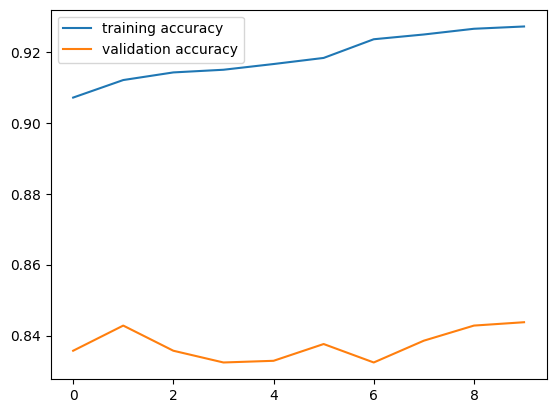

In [ ]:
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
inception_checkpoint_path = '/content/drive/MyDrive/InceptionEpochV2/inception_model_epoch_v210.h5'
if os.path.exists(inception_checkpoint_path):
    inception_model.load_weights(inception_checkpoint_path)

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpochV3/inception_model_epoch_{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - 163s 280ms/step - loss: 0.2094 - accuracy: 0.9285 - val_loss: 0.9416 - val_accuracy: 0.8333
Epoch 2/10
581/581 [==============================] - 159s 274ms/step - loss: 0.2065 - accuracy: 0.9298 - val_loss: 0.9194 - val_accuracy: 0.8414
Epoch 3/10
581/581 [==============================] - 157s 270ms/step - loss: 0.1874 - accuracy: 0.9362 - val_loss: 0.9377 - val_accuracy: 0.8366
Epoch 4/10
581/581 [==============================] - 160s 275ms/step - loss: 0.1859 - accuracy: 0.9353 - val_loss: 1.0387 - val_accuracy: 0.8385
Epoch 5/10
581/581 [==============================] - 159s 274ms/step - loss: 0.1830 - accuracy: 0.9376 - val_loss: 1.0935 - val_accuracy: 0.8404
Epoch 6/10
581/581 [==============================] - 157s 270ms/step - loss: 0.1832 - accuracy: 0.9357 - val_loss: 0.9207 - val_accuracy: 0.8423
Epoch 7/10
581/581 [==============================] - 160s 275ms/step - loss: 0.1773 - accuracy: 0.9380 - val_loss: 1.0413 -

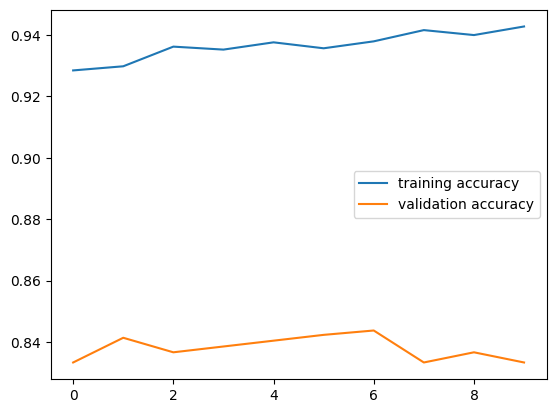

In [ ]:
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
inception_checkpoint_path = '/content/drive/MyDrive/InceptionEpochV3/inception_model_epoch_10.h5'
if os.path.exists(inception_checkpoint_path):
    inception_model.load_weights(inception_checkpoint_path)

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpochV4/inception_model_epoch_{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - 159s 273ms/step - loss: 0.1532 - accuracy: 0.9466 - val_loss: 1.0974 - val_accuracy: 0.8395
Epoch 2/10
581/581 [==============================] - 165s 283ms/step - loss: 0.1567 - accuracy: 0.9445 - val_loss: 1.0564 - val_accuracy: 0.8333
Epoch 3/10
581/581 [==============================] - 158s 272ms/step - loss: 0.1628 - accuracy: 0.9434 - val_loss: 1.2091 - val_accuracy: 0.8419
Epoch 4/10
581/581 [==============================] - 158s 272ms/step - loss: 0.1560 - accuracy: 0.9460 - val_loss: 1.1388 - val_accuracy: 0.8333
Epoch 5/10
581/581 [==============================] - 155s 267ms/step - loss: 0.1608 - accuracy: 0.9442 - val_loss: 1.1523 - val_accuracy: 0.8390
Epoch 6/10
581/581 [==============================] - 165s 284ms/step - loss: 0.1455 - accuracy: 0.9505 - val_loss: 1.1317 - val_accuracy: 0.8362
Epoch 7/10
581/581 [==============================] - 161s 276ms/step - loss: 0.1476 - accuracy: 0.9491 - val_loss: 1.1537 -

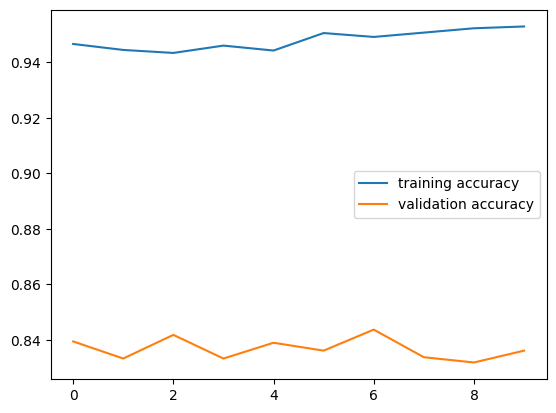

In [ ]:
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
inception_checkpoint_path = '/content/drive/MyDrive/InceptionEpochV4/inception_model_epoch_10.h5'
if os.path.exists(inception_checkpoint_path):
    inception_model.load_weights(inception_checkpoint_path)

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpochV5/inception_model_epoch_{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - 166s 285ms/step - loss: 0.1346 - accuracy: 0.9531 - val_loss: 1.2664 - val_accuracy: 0.8400
Epoch 2/10
581/581 [==============================] - 170s 292ms/step - loss: 0.1479 - accuracy: 0.9504 - val_loss: 1.2803 - val_accuracy: 0.8385
Epoch 3/10
581/581 [==============================] - 164s 283ms/step - loss: 0.1394 - accuracy: 0.9492 - val_loss: 1.4189 - val_accuracy: 0.8314
Epoch 4/10
581/581 [==============================] - 169s 290ms/step - loss: 0.1247 - accuracy: 0.9558 - val_loss: 1.4203 - val_accuracy: 0.8333
Epoch 5/10
581/581 [==============================] - 169s 290ms/step - loss: 0.1449 - accuracy: 0.9500 - val_loss: 1.2646 - val_accuracy: 0.8281
Epoch 6/10
581/581 [==============================] - 165s 283ms/step - loss: 0.1324 - accuracy: 0.9546 - val_loss: 1.4221 - val_accuracy: 0.8376
Epoch 7/10
581/581 [==============================] - 167s 287ms/step - loss: 0.1250 - accuracy: 0.9580 - val_loss: 1.2908 -

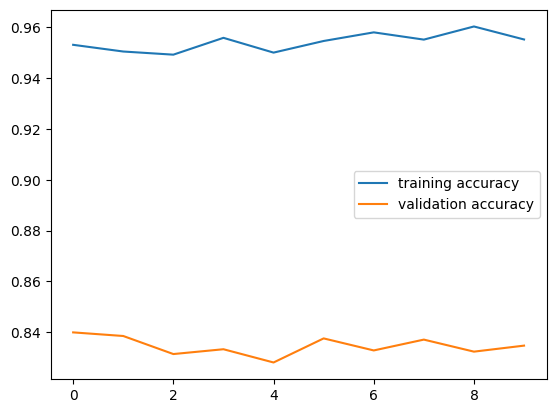

In [ ]:
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
inception_checkpoint_path = '/content/drive/MyDrive/InceptionEpochV5/inception_model_epoch_10.h5'
if os.path.exists(inception_checkpoint_path):
    inception_model.load_weights(inception_checkpoint_path)

In [ ]:
inception_checkpoint = ModelCheckpoint('/content/drive/MyDrive/InceptionEpochV6/inception_model_epoch_{epoch:02d}.h5', save_best_only=False)

In [ ]:
inception_model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    callbacks=[inception_checkpoint])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9554 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


581/581 [==============================] - 7284s 13s/step - loss: 0.1314 - accuracy: 0.9554 - val_loss: 1.2885 - val_accuracy: 0.8395
Epoch 2/10
581/581 [==============================] - 158s 271ms/step - loss: 0.1259 - accuracy: 0.9568 - val_loss: 1.5267 - val_accuracy: 0.8333
Epoch 3/10
581/581 [==============================] - 161s 277ms/step - loss: 0.1266 - accuracy: 0.9573 - val_loss: 1.4250 - val_accuracy: 0.8348
Epoch 4/10
581/581 [==============================] - 160s 275ms/step - loss: 0.1280 - accuracy: 0.9579 - val_loss: 1.5293 - val_accuracy: 0.8329
Epoch 5/10
581/581 [==============================] - 159s 274ms/step - loss: 0.1236 - accuracy: 0.9599 - val_loss: 1.4885 - val_accuracy: 0.8362
Epoch 6/10
581/581 [==============================] - 157s 270ms/step - loss: 0.1297 - accuracy: 0.9576 - val_loss: 1.5084 - val_accuracy: 0.8423
Epoch 7/10
581/581 [==============================] - 166s 285ms/step - loss: 0.1113 - accuracy: 0.9623 - val_loss: 1.6197 - val_accurac

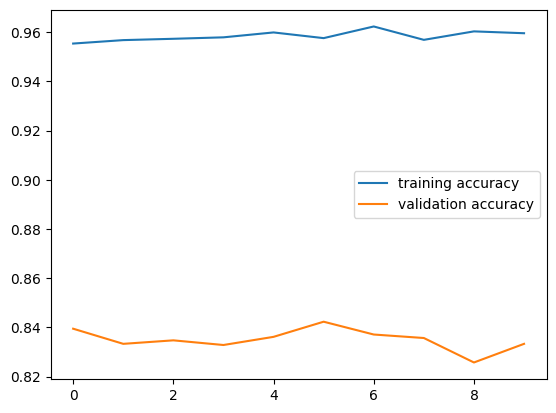

In [ ]:
import matplotlib.pyplot as plt
plt.plot(inception_model.history.history['accuracy'],label="training accuracy")
plt.plot(inception_model.history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
inception = load_model('/content/drive/MyDrive/InceptionEpochV6/inception_model_epoch_06.h5')

In [ ]:
results = inception.evaluate(validation_generator)


67/67 [==============================] - 332s 5s/step - loss: 1.5005 - accuracy: 0.8431


In [ ]:
accuracy = results[1] * 100
print(f'Model Accuracy on Validation Set: {accuracy:.2f}%')

Model Accuracy on Validation Set: 84.31%
